# Predict whether an adult is at risk of Diabetes

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
target_map = {0:0, 1:1, 2:1}
df['Diabetes_012'] = df['Diabetes_012'].map(target_map)
y = df['Diabetes_012']
y.unique()

array([0, 1])

In [5]:
y.value_counts(normalize=True)*100

Diabetes_012
0    84.24117
1    15.75883
Name: proportion, dtype: float64

In [7]:
X = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(202944, 21) (50736, 21) (202944,) (50736,)


In [11]:
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']
ordinal_features = ['GenHlth', 'Education', 'Income', 'Age']
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                  'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                  'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

## Model Training

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [12]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('ord', StandardScaler(), ordinal_features),
    ('bin', StandardScaler(), binary_features)
]
)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('ord', StandardScaler(),
                                                  ['GenHlth', 'Education',
                                                   'Income', 'Age']),
                                                 ('bin', StandardScaler(),
                                                  ['HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'DiffWalk',
                                                   'Sex'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

              precision    recall  f1-score   support

           0       0.94      0.72      0.82     42741
           1       0.34      0.76      0.47      7995

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736



Text(50.72222222222221, 0.5, 'True')

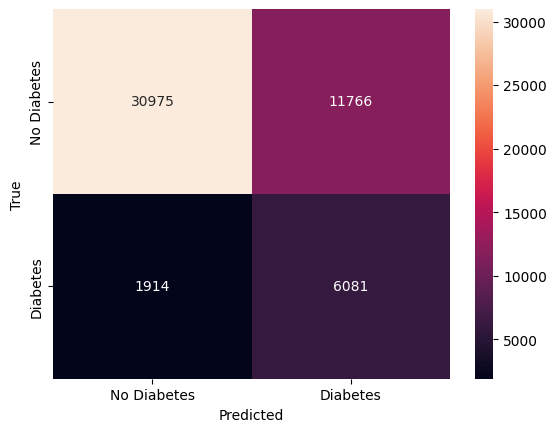

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_reg = reg_pipeline.predict(X_test)


print(classification_report(y_test, y_pred_reg))
cm = confusion_matrix(y_test, y_pred_reg)
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=['No Diabetes','Diabetes'],
           yticklabels=['No Diabetes','Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline(steps=[
    ('preprocessor','passthrough'),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', 'passthrough'),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     42741
           1       0.31      0.32      0.31      7995

    accuracy                           0.78     50736
   macro avg       0.59      0.59      0.59     50736
weighted avg       0.78      0.78      0.78     50736



Text(50.72222222222221, 0.5, 'True')

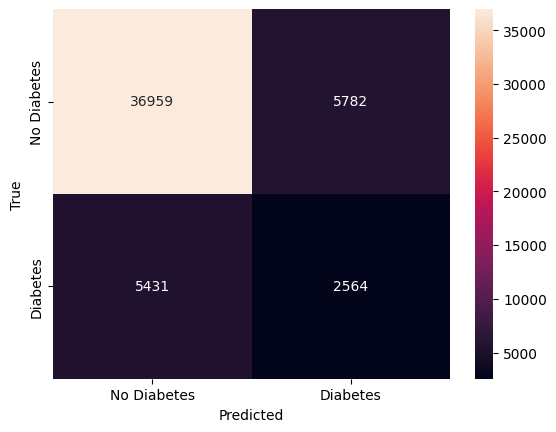

In [37]:
y_pred_dt = dt_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=['No Diabetes','Diabetes'],
           yticklabels=['No Diabetes','Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor','passthrough'),
    ('classifier', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', 'passthrough'),
                ('classifier', RandomForestClassifier())])

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     42741
           1       0.51      0.21      0.30      7995

    accuracy                           0.84     50736
   macro avg       0.69      0.59      0.61     50736
weighted avg       0.81      0.84      0.82     50736



Text(50.72222222222221, 0.5, 'True')

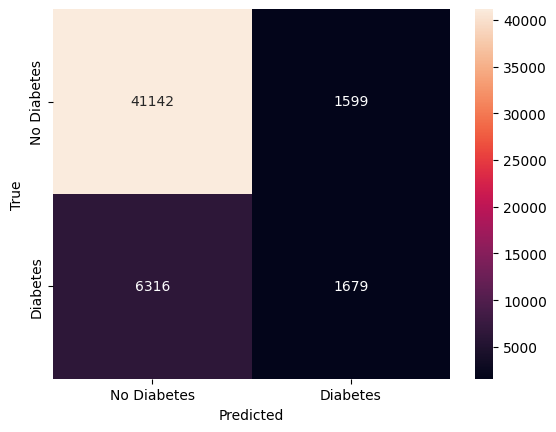

In [27]:
y_pred_rf = rf_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=['No Diabetes','Diabetes'],
           yticklabels=['No Diabetes','Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')

### Tune RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor','passthrough'),
    ('classifier', RandomForestClassifier(n_estimators=1000,
                                         criterion='gini',
                                         min_samples_split=10,
                                         random_state=42))
])

rf_pipeline.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=['No Diabetes','Diabetes'],
           yticklabels=['No Diabetes','Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')